# Analysis of numpy.random Python Package
Author: David Maguire
***

In [1]:
#numpy
import numpy as np

#matplotlib pyplot
import matplotlib.pyplot as plt

#numpy.random default_rng
from numpy.random import default_rng

#numpy.random Genrator and specific BitGenerators
from numpy.random import Generator, PCG64, MT19937

In [2]:
# Set a style for all plots used below (Classic is useful as it shows line between histogram bins)
plt.style.use('classic')


***
# 1. numpy.random

https://numpy.org/doc/stable/reference/random/index.html

[This earlier version](https://numpy.org/doc/1.16/reference/routines.random.html) contains the older numpy.random functions but categorised in the same categories as this notebook, so may be useful to look through

## How does numpy.random work?

numpy.random uses 2 methods to generate random numbers. These are:

- [**BitGenerators**](https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.BitGenerator.html#numpy.random.BitGenerator)  generate a sequence of 32 or 64 random bits

- [**Generators**](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator) tranforms those random bits into numbers that follow a specific probability distribution (see section 3 for specific distributions)

Throughout this workbook, the [**default_rng**](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng) function will be used. This uses the **PCG64** BitGenerator, however other BitGenerators can be used, such as the **MT19937** BitGenerator

In [3]:
# Assign different BitGenerators and default_rng
PCGrng = Generator(PCG64())
MTrng = Generator(MT19937())
rng = default_rng()

# Show bit generators assigned
# default_rng is PCG64 BitGenerator
print("PCGrng BitGenerator: ", PCGrng, "\n")
print("MTrng BitGenerator: ", MTrng, "\n")
print("default_rng BitGenerator: ", rng)

PCGrng BitGenerator:  Generator(PCG64) 

MTrng BitGenerator:  Generator(MT19937) 

default_rng BitGenerator:  Generator(PCG64)


In [4]:
# default_rng variable with seed to be used for all default_rng code below
rng = np.random.default_rng(2021)

### Process for generating random array of numbers

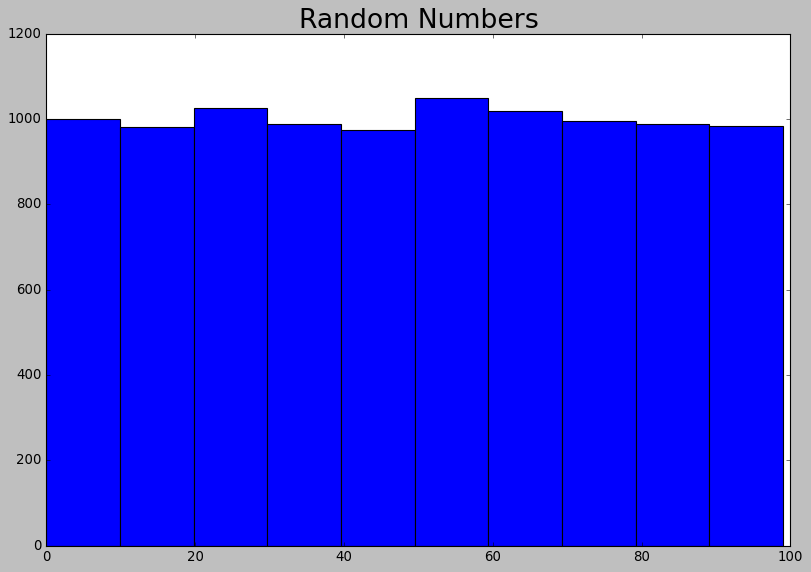

In [5]:
# rng = np.random.default_rng(2021)

# Call default_rng to get a new instance of a generator
rarray = rng.integers(0,100,10000)

# Set size of plot, give title and show
fig, ax = plt.subplots(figsize = (12,8))
ax.set_title('Random Numbers', fontsize = '24')
ax.hist(rarray)
plt.show;

#### Default_rng distribution
As shown by the plot above, the default distribution of default_rng is **uniform**, meaning that every number in the given range has the same probability of appearing.
More on distributions can be found in section 3.

***
# 2. Simple Random Data and Permutations

## Simple Random Data
Simple random data in numpy.random is the use of a Generator to produce random data with no set distribution. In the newest version of numpy.random, there are 4 types of simple random data:

- [**integers**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) produces random integers in a given range

- [**random**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random) returns random floats between 0.0 and 1.0

- [**choice**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) returns a random sample from a given array

- [**bytes**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) returns random bytes



#### Generator.integers
***

In [6]:
# random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

# If no high is given, first number is the high limit
intarray = rng.integers(10, size = 10)
print(intarray)

[2 0 9 0 0 9 1 9 4 2]


In [7]:
# If 2 numbers are given and no size, first number is low, second number is high
intarray = rng.integers(10, 20)
print(intarray)

19


In [8]:
# If 3 numbers are given, first number is low, second number is high, third is size
intarray = rng.integers(10, 20, 10)
print(intarray)

[13 19 18 19 16 13 14 10 12 12]


#### Generator.random
***

In [9]:
# random.Generator.random(size=None, dtype=np.float64, out=None)

# No input gives a random float between 0.0 and 1.0
randomarray = rng.random()
print(randomarray)

0.5003632947073116


In [19]:
# 1 input give an array of that size
randomarray = rng.random(10)
print(randomarray)

[0.16865121 0.30636551 0.2562599  0.79909808 0.17056308 0.54760513
 0.84303107 0.75740305 0.97878945 0.50176621]


In [111]:
# Floats can be in 64 or 32 bit
dtype64array = rng.random(10)
dtype32array = rng.random(10, dtype=np.float32)

# This function sets the precision to 20 to show the difference in bit size
np.set_printoptions(precision=20)

print("64 bit floats: ", dtype64array, "\n")
print("32 bit floats: ", dtype32array)

# Return to default (8) for rest of notebook
np.set_printoptions(precision=8)

64 bit floats:  [0.31335448681941014 0.5831297560958457  0.9316738424126431
 0.7447694892706187  0.12800402186211002 0.9577080025671327
 0.14582162742509652 0.3059766857003763  0.41230912986035095
 0.11762080363516814] 

32 bit floats:  [0.092797875  0.9562806    0.26813018   0.9789537    0.4982605
 0.5489123    0.02964878   0.0021309853 0.42443836   0.106642365 ]


#### Generator.choice
***

In [41]:
# random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

# Randomly chooses from an array
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices)
print(choicearray)

Apple


In [57]:
# Multiple choices can be made, choices by default can be made more than once
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 10)
print(choicearray)

['Apple' 'Apple' 'Apple' 'Apple' 'Orange' 'Banana' 'Apple' 'Apple' 'Apple'
 'Banana']


In [60]:
# Replace=False allows unique choices to be made only once, choices are shuffled by default
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 4, replace = False)
print(choicearray)

['Pear' 'Apple' 'Orange' 'Banana']


In [67]:
# Shuffle=False gives the choices in the same order as the given list
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 4, replace = False, shuffle=False)
print(choicearray)

['Apple' 'Banana' 'Orange' 'Pear']


In [83]:
# p allows a probability of each choice to be given (must add up to 1.0)
choices = ["Apple", "Banana", "Orange", "Pear"]
choicearray = rng.choice(choices, 20, p=[0.7,0,0.2,0.1])
print(choicearray)

['Apple' 'Apple' 'Apple' 'Pear' 'Orange' 'Orange' 'Orange' 'Pear' 'Orange'
 'Apple' 'Apple' 'Orange' 'Apple' 'Orange' 'Orange' 'Apple' 'Orange'
 'Apple' 'Apple' 'Apple']


In [110]:
# An int can also be given to choose a range of 0:a
choicearray = rng.choice(a=10, size=5)
print(choicearray)

[2 6 3 8 0]


#### Generator.bytes
***

In [154]:
# random.Generator.bytes(length)

# Retunrs random bytes of length given
bytestring = rng.bytes(20)
print(bytestring)

b'\xee|%K\xcc\x8b\xd1\xc8\x8c\x00D\xe8]\xb0\x85\xd4=\xb5E\xd8'


## Permutations

Permutation in numpy.random affect the **order** of the data given. TIn the newest version of numpy.random, there are 3 different ways of permutating data:

 - [shuffle](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) shuffles an array or sequence in-place changing the original array or sequence
 
 - [permutation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation) randomly permutes an array or sequence, returning a copy
 
 - [permutated](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted) randomly permutes an array or sequence along an axis

#### Generator.shuffle
***

In [169]:
# random.Generator.shuffle(x, axis=0)

# Create array from 1 to 9
array = np.arange(1,10)
print("Original array: ", array)

# Shuffles existing array
shuffle = rng.shuffle(array)

# This will not work as no copy was of array was made so shuffle is not assigned to anything
print(shuffle)

# Print shuffled array
print("Shuffled array: ", array)

Original array:  [1 2 3 4 5 6 7 8 9]
None
Shuffled array:  [8 9 4 5 3 2 6 1 7]


In [177]:
# Create array from 1 to 9 in a 3x3 shape
array = np.arange(1,10).reshape((3,3))
print("Original array: \n", array)

# Position of smaller arrays are shuffle but order within those arrays stays the same
rng.shuffle(array)
print("Shuffled array: \n", array)

# Shuffle along axis shuffles the order within smaller array but not position in larger array
rng.shuffle(array, axis=1)
print("Shuffled array along axis: \n", array)

Original array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Shuffled array: 
 [[4 5 6]
 [1 2 3]
 [7 8 9]]
Shuffled array along axis: 
 [[6 4 5]
 [3 1 2]
 [9 7 8]]


# Note about this line: Unlike shuffle, each slice along the given axis is shuffled independently of the others.

#### Generator.permutation
***

In [179]:
# random.Generator.permutation(x, axis=0)

# Create array from 1 to 9
array = np.arange(1,10)
print("Original array: ", array)

# Permutation does not change order of original array like shuffle, instead a new array is created
permute = rng.permutation(array)
print("Original array after permutation: ", array)
print("New permutation: ", permute)

Original array:  [1 2 3 4 5 6 7 8 9]
Original array after permutation:  [1 2 3 4 5 6 7 8 9]
New permutation:  [6 5 7 3 4 1 2 9 8]


In [183]:
# Create array from 1 to 9 in a 3x3 shape
array = np.arange(1,10).reshape((3,3))
print("Original array: \n", array)

# Permutations can also be performed via axes
permute = rng.permutation(array, axis=1)
print("Original array: \n", array)
print("Permuted array along axis: \n", permute)

Original array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Original array: 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Permuted array along axis: 
 [[2 1 3]
 [5 4 6]
 [8 7 9]]


#### Generator.permuted
***

# Note about this line: Unlike shuffle, each slice along the given axis is shuffled independently of the others.

***
## 3. Distributions

### Uniform Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform

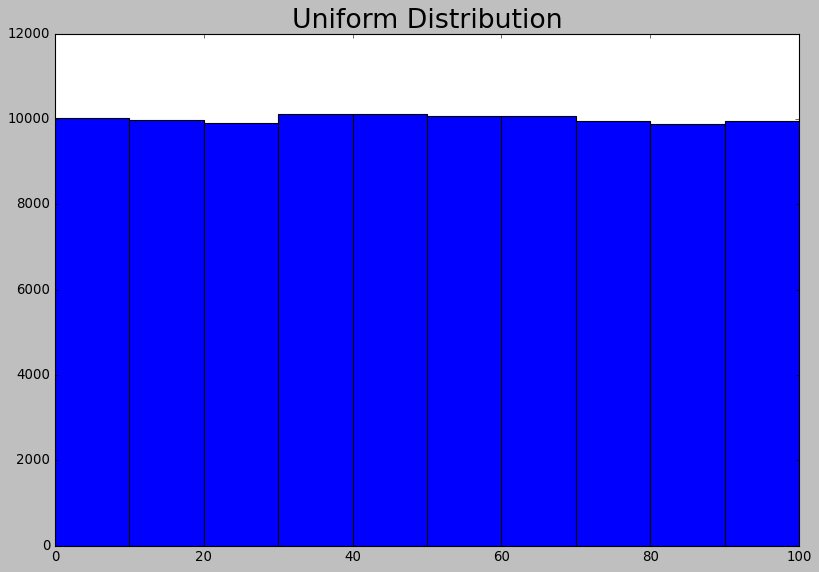

In [12]:
# rng = np.random.default_rng(2021)

rng = np.random.default_rng()
uarray = rng.uniform(0,100,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(uarray)
ax.set_title('Uniform Distribution', fontsize = '24')
plt.show;

***

### Normal Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal

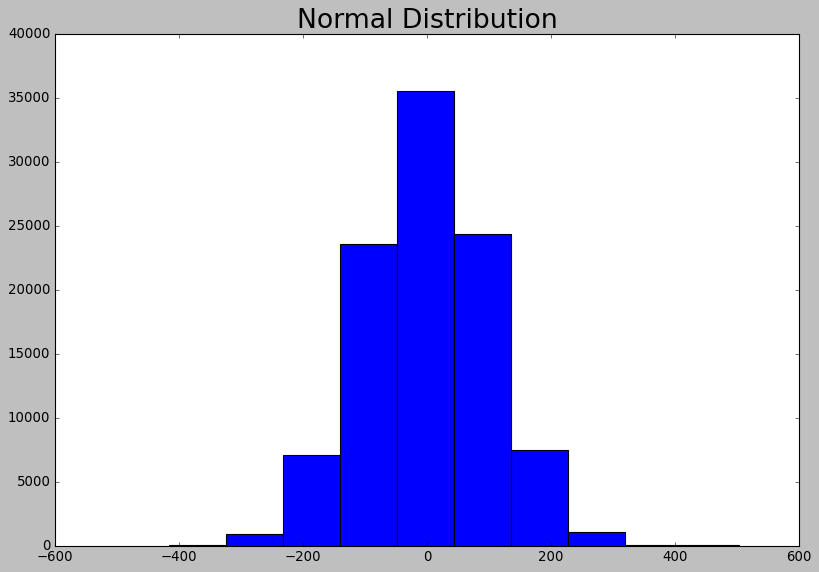

In [13]:
# rng = np.random.default_rng(2021)

normalarray = rng.normal(0,100,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(normalarray)
ax.set_title('Normal Distribution', fontsize = '24')
plt.show;

***

### Binomial Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial

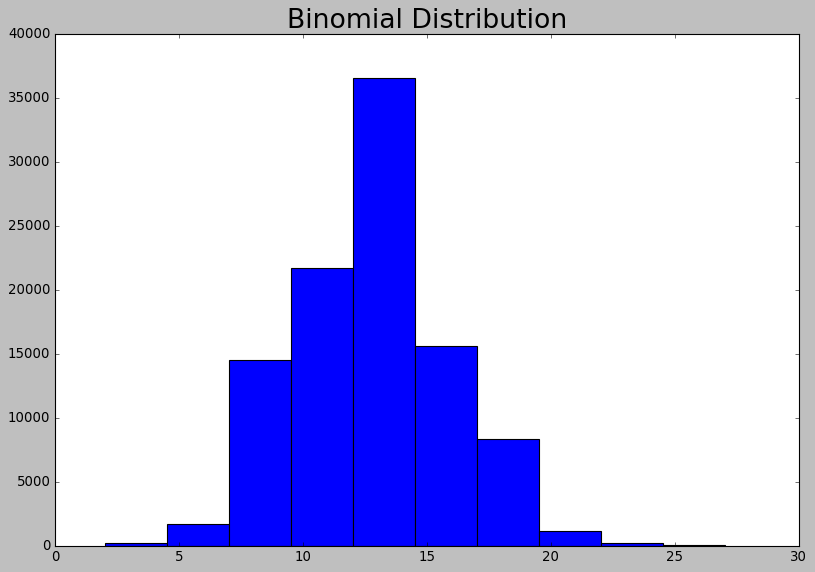

In [14]:
# rng = np.random.default_rng(2021)

n , p = 50, 0.25
biarray = rng.binomial(n , p ,100000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(biarray)
ax.set_title('Binomial Distribution', fontsize = '24')
plt.show;

***

### Exponential Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

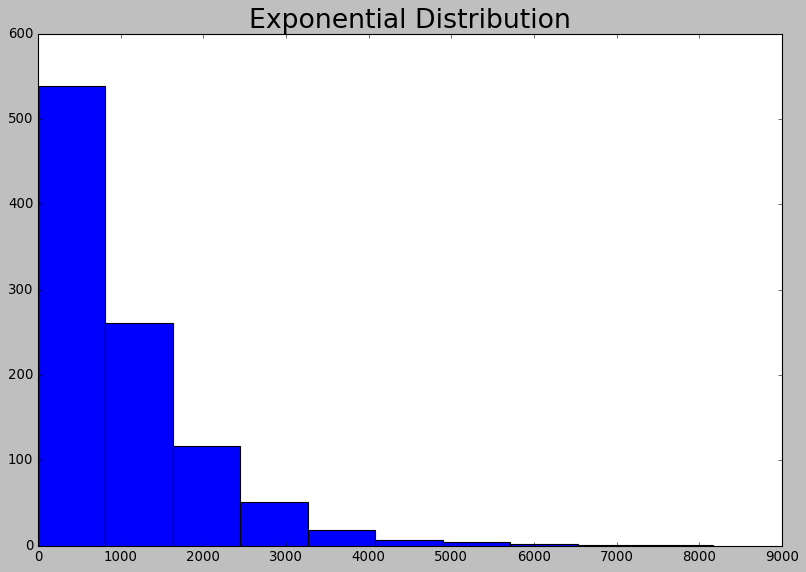

In [15]:
# rng = np.random.default_rng(2021)

exarray = rng.exponential(size=1000, scale=1000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(exarray)
ax.set_title('Exponential Distribution', fontsize = '24')
plt.show;

***

### Gamma Distribution

https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html#numpy.random.Generator.gamma

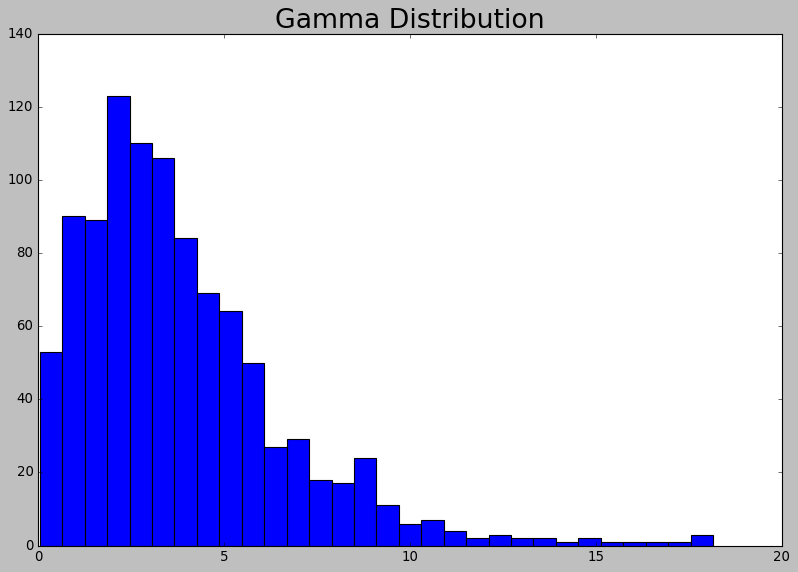

In [16]:
# rng = np.random.default_rng(2021)

shape, scale = 2., 2.
garray = rng.gamma(shape, scale, 1000)
fig, ax = plt.subplots(figsize = (12,8))
ax.hist(garray, bins = 30)
ax.set_title('Gamma Distribution', fontsize = '24')
plt.show();

***
## 4. Seeds

***
## References

These will be tidyed up closer to the submission of the assignment:

-https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf bit generator paper

-https://www.pcg-random.org/ PCG number generators

-https://towardsdatascience.com/random-seed-numpy-786cf7876a5f Article on random numbers in numpy

-https://www.freecodecamp.org/news/random-number-generator/ Article on Random Number Generators

-https://www.datacamp.com/community/tutorials/probability-distributions-python Random Distributions

-https://towardsdatascience.com/practical-guide-to-common-probability-distributions-in-machine-learning-487f6137625 More Random Distributions

-http://www.math.sci.hiroshima-u.ac.jp/m-mat/MT/ARTICLES/mt.pdf MT19937 BitGenerator paper

***
# End